In [121]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.filters.rank import entropy 
from skimage.morphology import disk 
import glob 

import pickle 
from matplotlib import pyplot as plt 
h=100
w=128

In [122]:
def getred(img):
    ir=[]
    for i in range(h):
        for j in range(w):
            ir.append(img[i][j][0])
            #print(imgo[i][j],1)
    ir=np.array(ir)
    print(ir.shape)
    irr=np.reshape(ir,(h,w))
    irr.shape
    return irr
def getgreen(img):
  ig=[]
  for i in range(h):
      for j in range(w):
          ig.append(img[i][j][1])
          #print(imgo[i][j],2)
  ig=np.array(ig)
  print(ig.shape)
  igg=np.reshape(ig,(h,w))
  igg.shape
  return igg
def getblue(img):
  ib=[]
  for i in range(h):
      for j in range(w):
          ib.append(img[i][j][2])
          #print(imgo[i][j],3)
  ib=np.array(ib)
  print(ib.shape)
  ibb=np.reshape(ib,(h,w))
  ibb.shape  
  return ibb

In [127]:
import numpy as np
import cv2
import pandas as pd

def feature_extraction(img):
    df = pd.DataFrame()
#All features generated must match the way features are generated for TRAINING.
#Feature1 is our original image pixels
    img2 = img.reshape(-1)
    df['Original Image'] = img2

#Generate Gabor features
    num = 1
    kernels = []
    for theta in range(2):
        theta = theta / 4. * np.pi
        for sigma in (1, 3):
            for lamda in np.arange(0, np.pi, np.pi / 4):
                for gamma in (0.05, 0.5):
#               print(theta, sigma, , lamda, frequency)
                
                    gabor_label = 'Gabor' + str(num)
#                    print(gabor_label)
                    ksize=9
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                    kernels.append(kernel)
                    #Now filter image and add values to new column
                    fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                    filtered_img = fimg.reshape(-1)
                    df[gabor_label] = filtered_img  #Modify this to add new column for each gabor
                    num += 1
########################################
#Geerate OTHER FEATURES and add them to the data frame
#Feature 3 is canny edge
    edges = cv2.Canny(img, 100,200)   #Image, min and max values
    edges1 = edges.reshape(-1)
    df['Canny Edge'] = edges1 #Add column to original dataframe

    from skimage.filters import roberts, sobel, scharr, prewitt

#Feature 4 is Roberts edge
    edge_roberts = roberts(img)
    edge_roberts1 = edge_roberts.reshape(-1)
    df['Roberts'] = edge_roberts1

#Feature 5 is Sobel
    edge_sobel = sobel(img)
    edge_sobel1 = edge_sobel.reshape(-1)
    df['Sobel'] = edge_sobel1

#Feature 6 is Scharr
    edge_scharr = scharr(img)
    edge_scharr1 = edge_scharr.reshape(-1)
    df['Scharr'] = edge_scharr1

    #Feature 7 is Prewitt
    edge_prewitt = prewitt(img)
    edge_prewitt1 = edge_prewitt.reshape(-1)
    df['Prewitt'] = edge_prewitt1

    #Feature 8 is Gaussian with sigma=3
    from scipy import ndimage as nd
    gaussian_img = nd.gaussian_filter(img, sigma=3)
    gaussian_img1 = gaussian_img.reshape(-1)
    df['Gaussian s3'] = gaussian_img1

    #Feature 9 is Gaussian with sigma=7
    gaussian_img2 = nd.gaussian_filter(img, sigma=7)
    gaussian_img3 = gaussian_img2.reshape(-1)
    df['Gaussian s7'] = gaussian_img3

    #Feature 10 is Median with sigma=3
    median_img = nd.median_filter(img, size=3)
    median_img1 = median_img.reshape(-1)
    df['Median s3'] = median_img1

    #Feature 11 is Variance with size=3
    variance_img = nd.generic_filter(img, np.var, size=3)
    variance_img1 = variance_img.reshape(-1)
    df['Variance s3'] = variance_img1  #Add column to original dataframe


    return df

In [128]:
def displayfeatures(df):
    ar=np.array(dfr['Gabor1'])
    arr=dfr.columns
    arr=np.array(arr)
    temp=[]
    for i in arr:
        ar=np.array(dfr[i])
        temp.append(ar)
    return temp

# Binary segmentation

In [129]:
import pickle
model=pickle.load(open('binary_model','rb')) 

C:\Users\sudhakararao\Desktop\Project\divideddataset\segsecond\org1.jpeg 0
C:\Users\sudhakararao\Desktop\Project\divideddataset\segsecond\org2.jpeg 1
C:\Users\sudhakararao\Desktop\Project\divideddataset\segsecond\org3.jpeg 2
C:\Users\sudhakararao\Desktop\Project\divideddataset\segsecond\org4.jpeg 3
C:\Users\sudhakararao\Desktop\Project\divideddataset\segsecond\org5.jpg 4
C:\Users\sudhakararao\Desktop\Project\divideddataset\segsecond\org6.jpeg 5
C:\Users\sudhakararao\Desktop\Project\divideddataset\segsecond\org7.jpeg 6
C:\Users\sudhakararao\Desktop\Project\divideddataset\segsecond\org8.jpeg 7
C:\Users\sudhakararao\Desktop\Project\divideddataset\segfirst\1seg.jpeg 8
C:\Users\sudhakararao\Desktop\Project\divideddataset\segfirst\2seg.jpeg 9
C:\Users\sudhakararao\Desktop\Project\divideddataset\segfirst\3seg.jpeg 10
C:\Users\sudhakararao\Desktop\Project\divideddataset\segfirst\4seg.jpeg 11
C:\Users\sudhakararao\Desktop\Project\divideddataset\segfirst\5seg.jpg 12
C:\Users\sudhakararao\Desktop

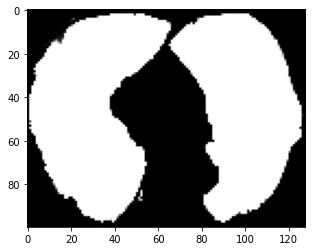

In [130]:
path=r'C:\Users\sudhakararao\Desktop\Project\divideddataset'
#l=['positive-hometratment','positive-hospitalize','positive-icu']
l1=['segsecond','segfirst']
all2=[]
ind=0
for i in l1:
    c=0
    dataset=os.path.join(path,i)
    for j in os.listdir(dataset): 
        imagepath=os.path.join(dataset,j)
        img=cv2.imread(imagepath)
        img=cv2.resize(img,(w,h))
        plt.imshow(img)
        all2.append(img)
        #print(c,end=" ")
        print(imagepath,ind)
        c+=1
        ind+=1
        if(c==50):
            break

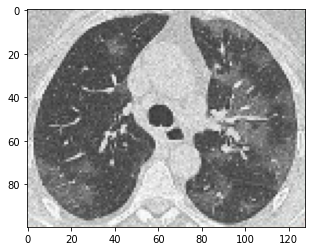

In [131]:
ck=3
plt.imshow(all2[ck])

(12800,)
12800


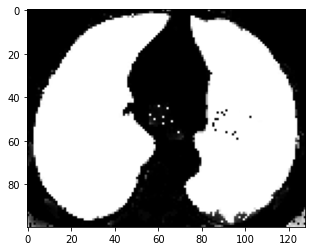

In [132]:
imgr=getred(all2[ck])
dfr = feature_extraction(imgr)
pre_r=model.predict(dfr)
s_r=pre_r.reshape((h,w))
print(len(pre_r))
plt.imshow(s_r,cmap='gray')
#plt.imshow(imgr,cmap='gray')

In [133]:
dfr.columns
arr=np.array(dfr.columns)

# left lung

In [134]:
mid=w//2+1
sum_left=0
for i in range(h):
    count=0
    for j in range(mid):
        #print(s_r[i][j],end=" ")
        if(s_r[i][j]>=200):
            count=count+1
    sum_left+=count
    #print(len(s_r[i]),end=" ")
    #print(count,sum_left)

In [135]:
totalpix=mid*h
result=(sum_left/totalpix)*100
print(sum_left,result) 

3679 56.599999999999994


# right lung

In [136]:
mid1=mid+1
end=w
sum_right=0
for i in range(h):
    count=0
    for j in range(mid1,end):
        #print(s_r[i][j],end=" ")
        if(s_r[i][j]>=200):
            count=count+1
    sum_right+=count
    #print(len(s_r[i]),end=" ")
    #print(count,sum_left)

In [137]:
totalpix1=(mid+1)*h
result1=(sum_right/totalpix)*100
print(sum_right,result1) 

3330 51.23076923076923


# results

In [138]:
def tumor(result,a):
    c=-1
    if(result>=50):
        print("No tumors in "+a+" lung")
        c=0
    elif(result<50 and result>=40):
        print("Stage-1 tumors in "+a+" lung")
        c=1
    elif(result<40 and result>=25):
        print("Stage-2 tumors in "+a+" lung")
        c=2
    elif(result<25):
        print("Stage-3 tumors in "+a+" lung")
        c=3
    return c

In [139]:
def risk(tumor,pne):
    if(tumor==0):
        if(pne<30):
            print("Home Treatment")
        elif(pne>=30 and pne<60):
            print("Hospitalized")
        else:
            print("ICU")
    elif(tumor==1):
        if(pne<10):
            print("Home Treatment")
        elif(pne>=10 and pne<30):
            print("Hospitalized")
        else:
            print("ICU")
    elif(tumor==2):
        if(pne<30):
            print("Hospitalized")
        else:
            print("ICU")
    elif(tumor==3):
        print("ICU")

# color segmentation

In [140]:
import pickle
model_r=pickle.load(open('rrcol_model','rb'))  

In [141]:
import pickle
model_g=pickle.load(open('gg_model','rb')) 

In [142]:
import pickle
model_b=pickle.load(open('bb_model','rb')) 

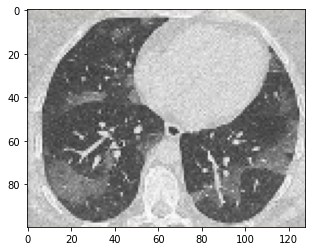

In [151]:
ck=2
plt.imshow(all2[ck])

(12800,)
12800


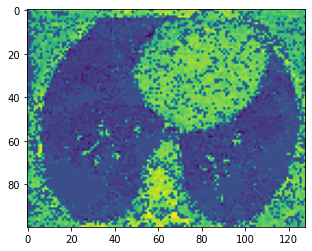

In [152]:
imgr=getred(all2[ck])
dfr = feature_extraction(imgr)
pre_r=model_r.predict(dfr)   
s_r=pre_r.reshape((h,w))
print(len(pre_r))
plt.imshow(s_r)

(12800,)
12800


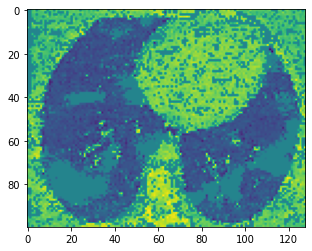

In [153]:
imgr=getgreen(all2[ck])
dfr = feature_extraction(imgr)
pre_g=model_g.predict(dfr)   
s_g=pre_g.reshape((h,w))
print(len(pre_g))
plt.imshow(s_g)

(12800,)
12800


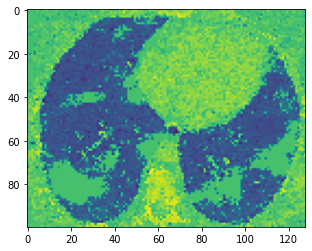

In [146]:
imgr=getblue(all2[ck])
dfr = feature_extraction(imgr)
pre_b=model_b.predict(dfr)   
s_b=pre_b.reshape((h,w))
print(len(pre_b))
plt.imshow(s_b)

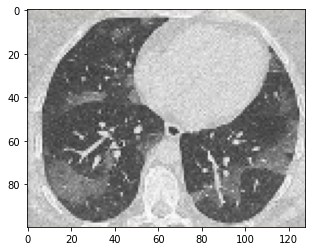

In [147]:
plt.imshow(all2[ck])

38400


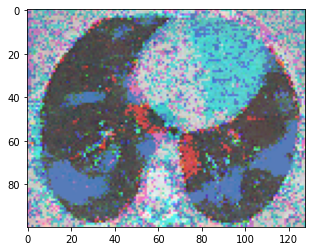

In [148]:
q=[]
for i in range(len(pre_b)):
  q.append(pre_r[i])
  q.append(pre_g[i])
  q.append(pre_b[i])
q=np.array(q)
print(len(q))
qq=np.reshape(q,(h,w,3))
plt.imshow(qq)

In [149]:
img = cv2.cvtColor(qq, cv2.COLOR_BGR2GRAY)

In [150]:
print(img[20])

[134 161 175 166 194 155 156 196 188 191 182 192 191 195 147 207 207 110
  72  77  72  81  65  72  75  72  68  74  74  72  65  74  71  79  75  76
  67  79  75  84  78  83  74  71  78  86  65  80 136  85 123 188 136 139
 177 203 159 209 206 203 199 150 150 149 142 151 163 202 188 204 202 206
 209 208 202 196 200 200 200 205 195 198 210 148 140 201 195 195 194 201
 208 137 147 144 189 200 198 137 137 204 184 186 182 188 188 142 197 190
 195 142 137 171 141 125 158 213 221 222 145 201 195 158 195 198 150 191
 177 179]


In [94]:
summ=0
for i in range(h):
    count=0
    for j in range(w):
        #print(s_r[i][j],end=" ")
        if(img[i][j]>=120 and img[i][j]<=145):
            count=count+1
    summ+=count
    #print(count)
    #print(len(s_r[i]),end=" ")
print(summ,end=" ")

1527 

In [61]:
total_pix=sum_left+sum_right
print(total_pix)

6206


In [62]:
result=(summ/total_pix)*100
result

25.153077666774088

In [63]:
c1=tumor(result,'left')
c2=tumor(result1,'right')

Stage-2 tumors in left lung
Stage-2 tumors in right lung


In [64]:
ans=min(result,result1)
c=max(c1,c2)
print(c)
tumor(ans,'overall')

2
Stage-2 tumors in overall lung


2

In [32]:
from skimage import filters,io
for i in range(42):
    imgarr=temp[i]
    imgarr=imgarr.reshape((h,w))
    g_i=filters.gaussian(imgarr,sigma=0)
    path=r"C:\Users\sudhakararao\Desktop\Project\filter_images"
    name=path+"\i"+arr[i]+".png"
    print(name)
    io.imsave(name,g_i)

NameError: name 'temp' is not defined